In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv(r"D:\heart_failure_clinical_records_dataset.csv")
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [7]:
df=data.copy()
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


Let's modify our "df" data frame by dropping unnecessary columns / rows, renaming the column names, changing the data type of column and so on

In [10]:
#renaming DEATH_EVENT as patient_dead for my convenience 
df.rename(columns = {'DEATH_EVENT':'patient_dead'}, inplace = True)
#drop the time column which is not necessary for our analysis 
df.drop(['time'],axis=1, inplace =True, errors = 'ignore')
#changing the data type of age column from float to int
df.age = df.age.astype(int)
#changing the data type of following columns to bool type for our convenience
df[['anaemia','diabetes','high_blood_pressure', 'smoking', 'patient_dead']] = df[['anaemia','diabetes', 'high_blood_pressure', 'smoking', 'patient_dead']].astype(bool)
#changing the value of sex column to male or female
df['sex'] = py.where(df['sex'] == 1, 'Male','Female')
#to convert the platelet-count into kilo-platelets/mcL 
df.platelets = (df. platelets/1000).astype(int)
df 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,True
1,55,False,7861,False,38,False,263,1.1,136,Male,False,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,61,True,38,True,155,1.1,143,Male,True,False
295,55,False,1820,False,38,False,270,1.2,139,Female,False,False
296,45,False,2060,True,60,False,742,0.8,138,Female,False,False
297,45,False,2413,False,38,False,140,1.4,140,Male,True,False


In [11]:
# check for null values
#isna().any() function returns 'True', if there's any null (Nan) value in data frame and returns False if there's no null value.

#checking for NaN values 
df.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
patient_dead                False
dtype: bool

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int32  
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    int32  
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    bool   
 11  patient_dead              299 non-null    bool   
dtypes: bool(5), float64(1), int32(2), int64(3), object(1)
memory usage: 15.6+ KB


In [13]:
df.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000
mean,60.829431,581.839465,38.083612,263.327759,1.39388,136.625418
std,11.894997,970.287881,11.834841,97.805105,1.03451,4.412477
min,40.000000,23.000000,14.000000,25.000000,0.50000,113.000000
25%,51.000000,116.500000,30.000000,212.500000,0.90000,134.000000
50%,60.000000,250.000000,38.000000,262.000000,1.10000,137.000000
75%,70.000000,582.000000,45.000000,303.500000,1.40000,140.000000
max,95.000000,7861.000000,80.000000,850.000000,9.40000,148.000000


In [15]:
#to drop creatinine_phosphokinase column
df.drop('creatinine_phosphokinase', inplace = True, axis = 1, errors ='ignore')

Let's check the column names of our data frame using columns() function in pandas

In [16]:
#to display column names
df.columns 

Index(['age', 'anaemia', 'diabetes', 'ejection_fraction',
       'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium',
       'sex', 'smoking', 'patient_dead'],
      dtype='object')

In [18]:
#to save the html table as pandas data frame 
column_details_df = pd.read_html("https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1 ")[0]
#to drop the unnecessary column
column_details_df.drop('Range', axis =1,inplace = True, errors='ignore' )
#to drop the unnecessary rows
column_details_df.drop([3,4,7,13], axis = 0, inplace =True, errors ='ignore')
#to rename the column names
column_details_df.columns = ['feature', 'explanation', 'measurement_unit']
column_details_df 

,feature,explanation,measurement_unit
0,Age,Age of the patient,Years
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean
2,High blood pressure,If a patient has hypertension,Boolean
5,Diabetes,If the patient has diabetes,Boolean
6,Ejection fraction,Percentage of blood leaving,Percentage
8,Sex,Woman or man,Binary
9,Platelets,Platelets in the blood,kiloplatelets/mL
10,Serum creatinine,Level of creatinine in the blood,mg/dL
11,Serum sodium,Level of sodium in the blood,mEq/L
12,Smoking,If the patient smokes,Boolean


In [19]:
#to rearrange and rename the rows to match the df 
column_details_df = column_details_df.reindex([0,1,5,6,2,9,10,11,8,12,14])
column_details_df.feature = df.columns

In [20]:
#to set the feature column as index for our convenience 
column_details_df.set_index(['feature'], inplace =True)

In [21]:
#to change the details in explanation column 
column_details_df['explanation']['anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'sex', 'smoking', 'patient_dead'] = ['True, if the patient has Anaemia',
                                                                                                                                                      'True, if the patient has Diabetes', 
                                                                                                                                                      '% of blood leaving the heart at each contraction', 
                                                                                                                                                      'True, if the patient has High blood pressure', 
                                                                                                                                                      'Amount of platelets in the blood', 
                                                                                                                                                      'Male or Female',
                                                                                                                                                      'True, if the patient smokes', 
                                                                                                                                                      'True, if the patient died during the follow-up period']

In [22]:
#to change the details in measurement unit column 
column_details_df.measurement_unit['sex', 'platelets','serum_creatinine','serum_sodium'] = ['Boolean',
                                                                                            'kilo-platelets / mcL (microliter)', 
                                                                                            'mg/dL (milligrams per deciliter)', 
                                                                                            'mEq/L (milliequivalents per litre)'
                                                                                            ] 

In [23]:
#let's add another column to mention normal values of the attributes 
column_details_df["normal_value"] = ['None', 
                                     'None', 
                                     'None',
                                     '55% - 70%',
                                     'None', 
                                     '150 - 400 kilo-platelets / mcL', 
                                     '0.6 - 1.2 mg/dL', 
                                     '135 - 145 mEq /L', 
                                     'None', 'None', 'None'
                                    ] 
column_details_df

,explanation,measurement_unit,normal_value
feature,,,
age,Age of the patient,Years,None
anaemia,"True, if the patient has Anaemia",Boolean,None
diabetes,"True, if the patient has Diabetes",Boolean,None
ejection_fraction,% of blood leaving the heart at each contraction,Percentage,55% - 70%
high_blood_pressure,"True, if the patient has High blood pressure",Boolean,None
platelets,Amount of platelets in the blood,kilo-platelets / mcL (microliter),150 - 400 kilo-platelets / mcL
serum_creatinine,Level of creatinine in the blood,mg/dL (milligrams per deciliter),0.6 - 1.2 mg/dL
serum_sodium,Level of sodium in the blood,mEq/L (milliequivalents per litre),135 - 145 mEq /L
sex,Male or Female,Boolean,None


In [41]:
column_details_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, age to patient_dead
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   explanation       11 non-null     object
 1   measurement_unit  11 non-null     object
 2   normal_value      11 non-null     object
dtypes: object(3)
memory usage: 652.0+ bytes


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  299 non-null    int32  
 1   anaemia              299 non-null    bool   
 2   diabetes             299 non-null    bool   
 3   ejection_fraction    299 non-null    int64  
 4   high_blood_pressure  299 non-null    bool   
 5   platelets            299 non-null    int32  
 6   serum_creatinine     299 non-null    float64
 7   serum_sodium         299 non-null    int64  
 8   sex                  299 non-null    object 
 9   smoking              299 non-null    bool   
 10  patient_dead         299 non-null    bool   
dtypes: bool(5), float64(1), int32(2), int64(2), object(1)
memory usage: 13.3+ KB


In [27]:
#Number of Male and Female patients
df.sex.value_counts()

Male      194
Female    105
Name: sex, dtype: int64

In [29]:
#Number of Patients with Anaemia
df.anaemia.value_counts()

False    170
True     129
Name: anaemia, dtype: int64

In [31]:
#Number of Patients with Diabetes
df.diabetes.value_counts()

False    174
True     125
Name: diabetes, dtype: int64

In [33]:
#Number of Patients with High Blood Pressure
df.high_blood_pressure.value_counts()

False    194
True     105
Name: high_blood_pressure, dtype: int64

In [34]:
#Number of Patients with Smoking Habit
df.smoking.value_counts()

False    203
True      96
Name: smoking, dtype: int64

In [35]:
#Number of Patients died during follow-up period
df.groupby(['patient_dead', 'sex']).size().reset_index().pivot(columns= 'patient_dead',index = 'sex', values=0)

patient_dead,False,True
sex,,
Female,71,34
Male,132,62


In [36]:
#to find the normal value of Ejection Fraction 
column_details_df.normal_value['ejection_fraction']

'55% - 70%'

In [38]:
abn_ef = df[(df.ejection_fraction < 55) | (df.ejection_fraction >70)]
abn_ef

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,False,20,True,265,1.9,130,Male,False,True
1,55,False,False,38,False,263,1.1,136,Male,False,True
2,65,False,False,20,False,162,1.3,129,Male,True,True
3,50,True,False,20,False,210,1.9,137,Male,False,True
4,65,True,True,20,False,327,2.7,116,Female,False,True
...,...,...,...,...,...,...,...,...,...,...,...
293,63,True,True,35,False,179,0.9,136,Male,True,False
294,62,False,True,38,True,155,1.1,143,Male,True,False
295,55,False,False,38,False,270,1.2,139,Female,False,False
297,45,False,False,38,False,140,1.4,140,Male,True,False


In [39]:
#Number of Patients with Abnormal Platelets Count
#to find the normal value of Platelets Count 
column_details_df.normal_value['platelets']

'150 - 400 kilo-platelets / mcL'

In [42]:
abn_platelets = df[(df.platelets < 150) | (df.platelets >400)]
abn_platelets 

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
6,75,True,False,15,False,127,1.20,137,Male,False,True
7,60,True,True,60,False,454,1.10,131,Male,True,True
12,45,True,False,30,False,136,1.10,137,Male,False,True
14,49,True,False,30,True,427,1.00,138,Female,False,False
15,82,True,False,50,False,47,1.30,136,Male,False,True
19,48,True,True,55,False,87,1.90,121,Female,False,True
25,80,False,True,38,False,149,1.90,144,Male,True,True
47,60,False,True,38,True,451,0.60,138,Male,True,True
48,80,True,False,20,True,140,4.40,133,Male,False,True
51,53,True,False,20,True,418,1.40,139,Female,False,True


In [43]:
#to find the normal value of Creatinine level in the blood 
column_details_df.normal_value['serum_creatinine']

'0.6 - 1.2 mg/dL'

In [44]:
abn_creatinine = df[(df.serum_creatinine < 0.6) | (df.serum_creatinine >1.2)]
abn_creatinine 

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,False,20,True,265,1.9,130,Male,False,True
2,65,False,False,20,False,162,1.3,129,Male,True,True
3,50,True,False,20,False,210,1.9,137,Male,False,True
4,65,True,True,20,False,327,2.7,116,Female,False,True
5,90,True,False,40,True,204,2.1,132,Male,True,True
...,...,...,...,...,...,...,...,...,...,...,...
282,42,False,False,30,False,215,3.8,128,Male,True,False
286,60,False,False,35,False,279,1.7,140,Male,False,False
291,60,False,False,35,False,133,1.4,139,Male,False,False
297,45,False,False,38,False,140,1.4,140,Male,True,False


In [45]:
#to find the normal value of Sodium level in the blood 
column_details_df.normal_value['serum_sodium']


'135 - 145 mEq /L'

In [46]:
abn_sodium = df[(df.serum_sodium < 135) | (df.serum_sodium >145)]
abn_sodium 

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
0,75,False,False,20,True,265,1.9,130,Male,False,True
2,65,False,False,20,False,162,1.3,129,Male,True,True
4,65,True,True,20,False,327,2.7,116,Female,False,True
5,90,True,False,40,True,204,2.1,132,Male,True,True
7,60,True,True,60,False,454,1.1,131,Male,True,True
...,...,...,...,...,...,...,...,...,...,...,...
270,44,False,True,30,True,263,1.6,130,Male,True,False
271,51,False,True,40,False,221,0.9,134,Female,False,False
272,67,False,False,38,False,215,1.2,133,Female,False,False
282,42,False,False,30,False,215,3.8,128,Male,True,False


Sample Data

We've now cleaned up and prepared the dataset for our analysis. Let's take a look at a sample of rows from the data frame

In [47]:
df.sample(5)

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead
36,90,True,True,50,False,226,1.0,134,Male,False,True
185,60,True,True,30,False,389,1.5,136,Male,False,True
111,55,False,False,35,False,228,1.2,135,Male,True,False
205,50,True,True,45,False,362,1.0,136,Female,False,False
96,63,True,True,25,True,254,1.3,134,Male,False,False


Exploratory Data Analysis & Visualization
Data visualization is the representation of data through use of common graphics, such as charts, plots, infographics, and even animations. These visual displays of information communicate complex data relationships and data-driven insights in a way that is easy to understand.

Let's install and import "seaborn" library as "sns" and "matplotlib.pyplot" module as "plt" to perform some visualization operations on our data frame to understand the distribution and relationships of attributes.

In [48]:
#import seaborn and matplotlib.pyplot 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline 
#set some default style for our graphs
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = 'white'

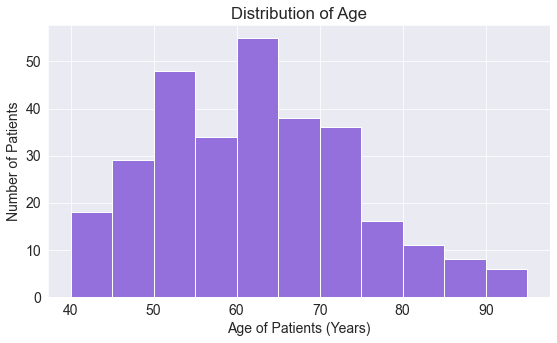

In [51]:
plt.hist(df.age, bins=py.arange(40,100, 5), color ='mediumpurple')
plt.xlabel("Age of Patients (Years)")
plt.ylabel("Number of Patients")
plt.title("Distribution of Age");

Gender

The distribution of gender of the Heart Failure patients is another crucial factor to look at. Let's visualize the gender distribution using pie chart.

In [52]:
#to store the gender counts into a variable
gender_counts = df.sex.value_counts()

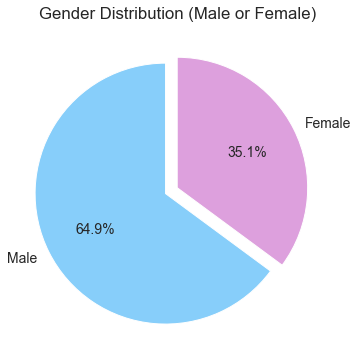

In [53]:
plt.figure(figsize=(12, 6))
plt.pie(gender_counts, labels = gender_counts.index, autopct ='%.1f%%', startangle = 90, explode = [0.1, 0], colors = ['lightskyblue', 'plum'])
plt.title("Gender Distribution (Male or Female)");

Death

Let's check the relationship between death of the patients and their age group and gender.

Death Rate

An important factor to look at is the percentage of patients died during the follow-up period. Let's use pie chart to visualize.

In [54]:
#count number of patients dead
dead_counts = df.patient_dead.value_counts()
dead_counts 

False    203
True      96
Name: patient_dead, dtype: int64

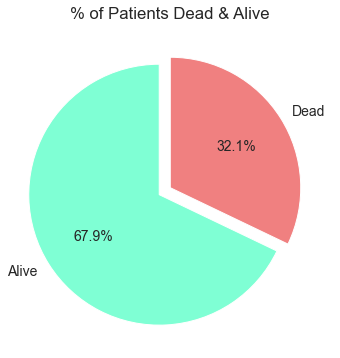

In [55]:
plt.figure(figsize=(12, 6))
plt.pie(dead_counts, labels = ['Alive', 'Dead'] , autopct ='%.1f%%', startangle = 90, explode=[0.1, 0], colors =['aquamarine', 'lightcoral'])
plt.title("% of Patients Dead & Alive");

Death and Age Group

Let's define a helper function to create another column in our actual data frame which describes the age group of the heart failure patients. Since, the age of patients ranges from 40 to 95 years. Let's group them into a category like '40-45', '45-50', '50-55', '55-60' and so on. Age groups of the patient helps us to easily understand and visualize relationship of various attributes with age

In [58]:
def create_range_series(number_series):
    """Creates a series with range(group) for the numeric values 
    provided in another series which is passed as an argument.
    This function takes only one argument which is (Pandas) series object, 
    returns another (Pandas) series object. 
    
    Argument:
        number_series - A column in pandas data frame with numeric values. 
    """
    condition = [
    (number_series >= 0) & (number_series < 5), 
    (number_series >= 5) & (number_series < 10), 
    (number_series >= 10) & (number_series < 15), 
    (number_series >= 15) & (number_series < 20), 
    (number_series >= 20) & (number_series < 25), 
    (number_series >= 25) & (number_series < 30), 
    (number_series >= 30) & (number_series < 35), 
    (number_series >= 35) & (number_series < 40), 
    (number_series >= 40) & (number_series < 45), 
    (number_series >= 45) & (number_series < 50), 
    (number_series >= 50) & (number_series < 55), 
    (number_series >= 55) & (number_series < 60), 
    (number_series >= 60) & (number_series < 65), 
    (number_series >= 65) & (number_series < 70), 
    (number_series >= 70) & (number_series < 75), 
    (number_series >= 75) & (number_series < 80), 
    (number_series >= 80) & (number_series < 85), 
    (number_series >= 85) & (number_series < 90), 
    (number_series >= 90) & (number_series < 95), 
    (number_series >= 95) & (number_series < 100)
    ]
    
    output = ['0-5', 
              '5-10', 
              '10-15', 
              '15-20', 
              '20-25', 
              '25-30', 
              '30-35', 
              '35-40', 
              '40-45', 
              '45-50', 
              '50-55', 
              '55-60', 
              '60-65', 
              '65-70', 
              '70-75', 
              '75-80', 
              '80-85', 
              '85-90', 
              '90-95', 
              '95-100'
              ] 
    result = py.select(condition, output, '>100')
    return pd.Series(result)

In [59]:
#to create a column with age group 
df['age_group'] = create_range_series(df.age)
df

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead,age_group
0,75,False,False,20,True,265,1.9,130,Male,False,True,75-80
1,55,False,False,38,False,263,1.1,136,Male,False,True,55-60
2,65,False,False,20,False,162,1.3,129,Male,True,True,65-70
3,50,True,False,20,False,210,1.9,137,Male,False,True,50-55
4,65,True,True,20,False,327,2.7,116,Female,False,True,65-70
...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,True,38,True,155,1.1,143,Male,True,False,60-65
295,55,False,False,38,False,270,1.2,139,Female,False,False,55-60
296,45,False,True,60,False,742,0.8,138,Female,False,False,45-50
297,45,False,False,38,False,140,1.4,140,Male,True,False,45-50


In [61]:
dead_patients = df[df.patient_dead == True].groupby('age_group').count()
alive_patients = df[df.patient_dead == False].groupby('age_group').count()

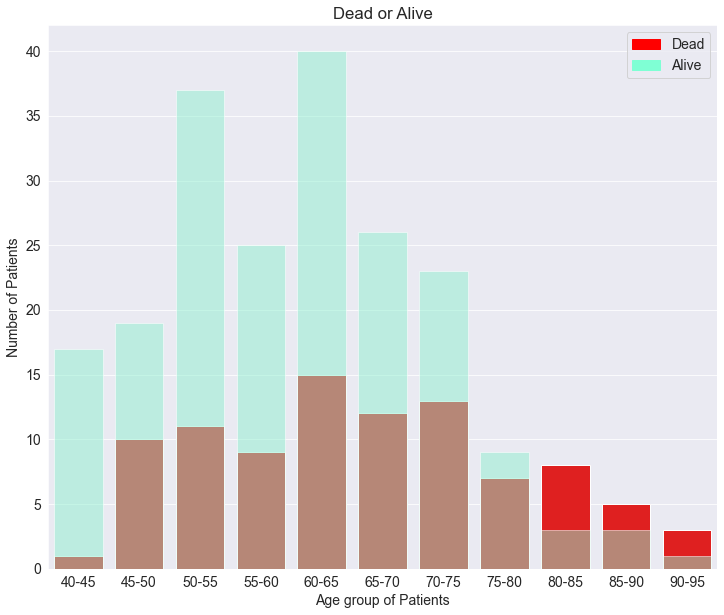

In [62]:
plt.figure(figsize=(12,10))
sns.barplot(x = dead_patients.index , y = dead_patients.patient_dead, alpha=1, palette =['red'])
sns.barplot(x = alive_patients.index, y = alive_patients.patient_dead, alpha = 0.5, palette = ['aquamarine'], estimator=sum, ci=None, )
plt.title('Dead or Alive')
plt.xlabel('Age group of Patients')
dead = mpatches.Patch(color= 'red', label='Dead')
alive = mpatches.Patch(color='aquamarine', label='Alive')
plt.legend(handles=[dead, alive])
plt.ylabel('Number of Patients');

Death and Gender

We already have a look at the relationship between the different age groups and death rate. Now let's have a look at how the death rate varies with respect to patients gender. Let's use 'countplot' function from seaborn library to visualize

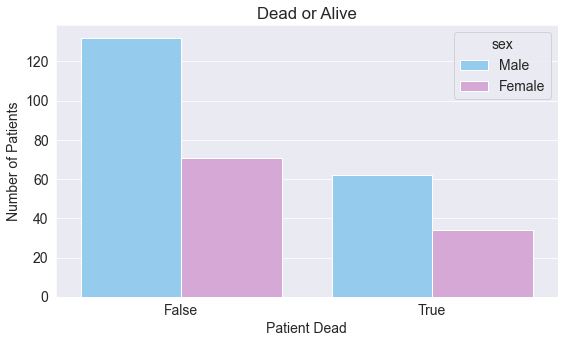

In [64]:
sns.countplot(x = df.patient_dead, hue = df.sex, palette =['lightskyblue', 'plum'])
plt.title('Dead or Alive')
plt.xlabel('Patient Dead')
plt.ylabel('Number of Patients');

Diseases

We have to analyze the number of patients having anaemia, diabetes, high blood pressure, smoking habit, abnormal ejection fraction, abnormal creatinine and sodium level.

So, let's create another column in our data frame to indicate the abnormalities of the various records.

Let's use 'subplot' function from 'matplotlib.pyplot' to display 8 plots in a single output.

In [66]:
#create columns to indicate abnormalities 
df['abnormal_ef'] = py.where(((df.ejection_fraction >= 55) & (df.ejection_fraction <=70)) , 'Normal', 'Abormal')
df['abnormal_platelets'] = py.where(((df.platelets >= 150) & (df.platelets <= 400)) , 'Normal', 'Abnormal')
df['abnormal_creatinine'] = py.where(((df.serum_creatinine >= 0.6) & (df.serum_creatinine <= 1.2)), 'Normal','Abnormal')
df['abnormal_sodium'] = py.where(((df.serum_sodium >= 135) & (df.serum_sodium <= 145)) , 'Normal', 'Abnormal') 

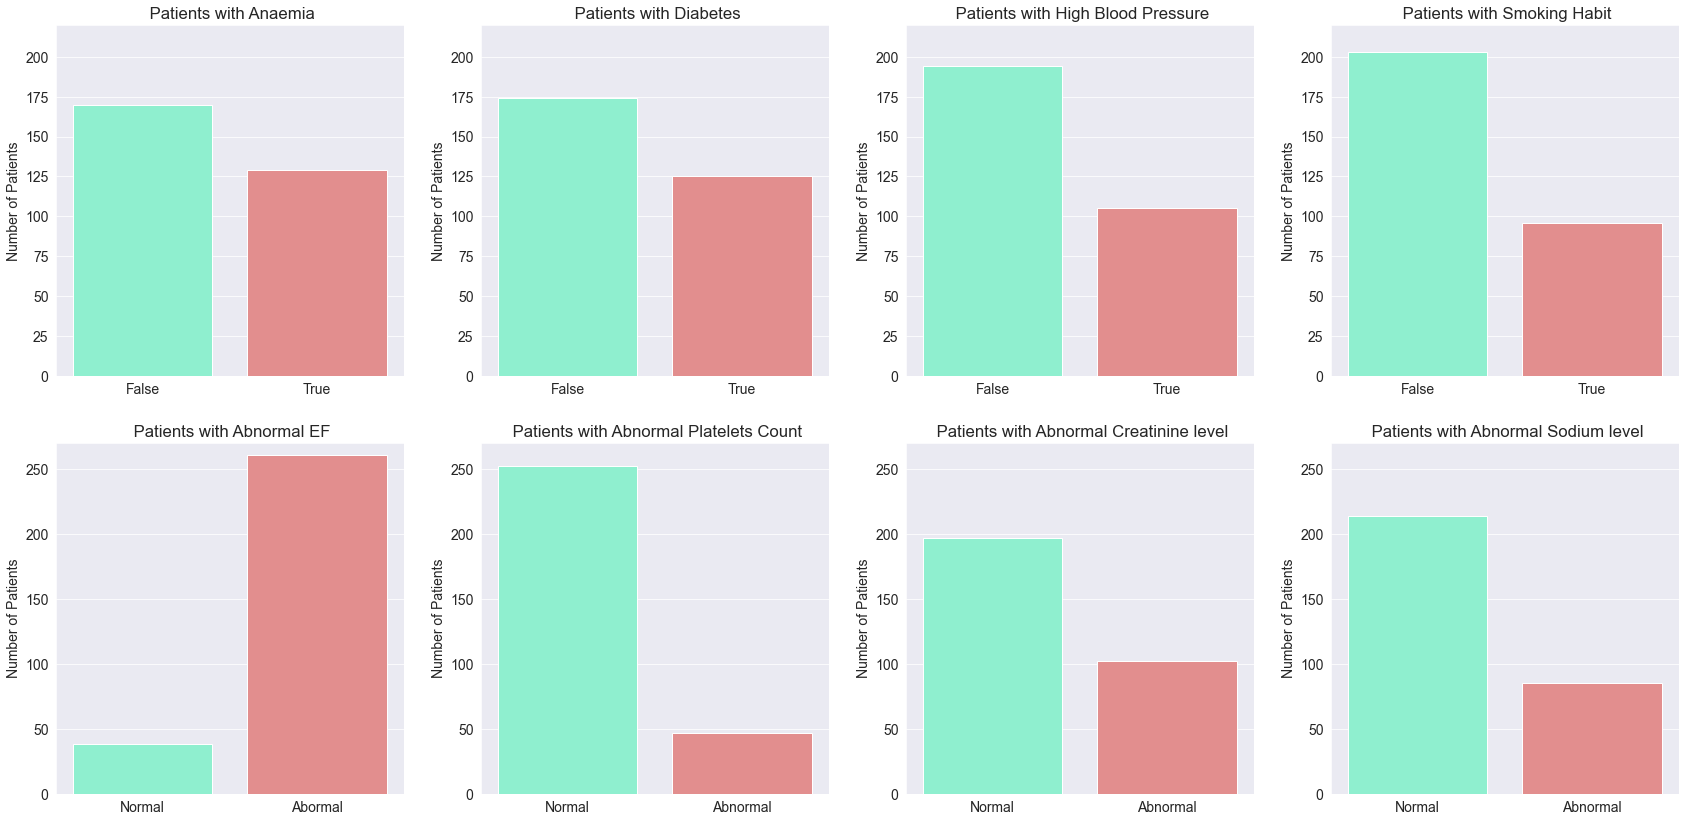

In [67]:
fig, axis = plt.subplots(2,4, figsize =(24, 12)) 
#axis(0,0) use this axis for Anaemia 
axis[0,0].set_title(" Patients with Anaemia")
sns.countplot(x = df.anaemia, ax=axis[0,0], palette=['aquamarine', 'lightcoral'] )
axis[0,0].set_xlabel("")
axis[0,0].set_ylabel("Number of Patients")
axis[0,0].set_ylim([0, 220])

#axis(0,1) use this axis for Diabetes 
axis[0,1].set_title(" Patients with Diabetes")
sns.countplot(x = df.diabetes, ax=axis[0,1], palette=['aquamarine', 'lightcoral'])
axis[0,1].set_xlabel("")
axis[0,1].set_ylabel("Number of Patients")
axis[0,1].set_ylim([0, 220])


#axis(0,2) use this axis for High blood pressure 
axis[0,2].set_title(" Patients with High Blood Pressure")
sns.countplot(x = df.high_blood_pressure, ax=axis[0,2], palette=['aquamarine', 'lightcoral'])
axis[0,2].set_xlabel("")
axis[0,2].set_ylabel("Number of Patients")
axis[0,2].set_ylim([0, 220])

#axis(0,3) use this axis for smoking habit 
axis[0,3].set_title(" Patients with Smoking Habit")
sns.countplot(x = df.smoking, ax=axis[0,3], palette=['aquamarine', 'lightcoral'])
axis[0,3].set_xlabel("")
axis[0,3].set_ylabel("Number of Patients")
axis[0,3].set_ylim([0, 220])


#axis(1,0) use this axis for Ejection Fraction 
axis[1,0].set_title(" Patients with Abnormal EF")
sns.countplot(x = df.abnormal_ef.sort_values(ascending =False) , ax=axis[1,0], palette=['aquamarine', 'lightcoral'])
axis[1,0].set_xlabel("")
axis[1,0].set_ylabel("Number of Patients")
axis[1,0].set_ylim([0, 270])

#axis(1,1) use this axis for Platelets count 
axis[1,1].set_title(" Patients with Abnormal Platelets Count")
sns.countplot(x = df.abnormal_platelets.sort_values(ascending =False) , ax=axis[1,1], palette=['aquamarine', 'lightcoral'])
axis[1,1].set_xlabel("")
axis[1,1].set_ylabel("Number of Patients")
axis[1,1].set_ylim([0, 270])

#axis(1,2) use this axis for Creatinine level 
axis[1,2].set_title(" Patients with Abnormal Creatinine level")
sns.countplot(x = df.abnormal_creatinine.sort_values(ascending =False), ax=axis[1,2], palette=['aquamarine', 'lightcoral'])
axis[1,2].set_xlabel("")
axis[1,2].set_ylabel("Number of Patients")
axis[1,2].set_ylim([0, 270])

#axis(1,3) use this axis for sodium level
axis[1,3].set_title(" Patients with Abnormal Sodium level")
sns.countplot(x = df.abnormal_sodium.sort_values(ascending =False), ax=axis[1,3], palette=['aquamarine', 'lightcoral'])
axis[1,3].set_xlabel("")
axis[1,3].set_ylabel("Number of Patients")
axis[1,3].set_ylim([0, 270])

#to provide spacing between adjacent plots
plt.tight_layout(pad=2);

Pair wise relationship

A pair plot gives pairwise relationships in a dataset. Let’s say that we have 5 variables in a dataset. When we implement pair plot with this data, it will create plots between those 5 variables. Say for example, the first variable will be taken as the x-axis value and other variables will be taken as y-axis value individually. As a result, you will have 5 plots for 1st variable alone. This will be repeated for the other variables as well.

The idea behind pair plot is to understand the relationship between the variables present in the data.

Let's separate numeric columns from the dataset to apply 'pairplot' function to understand the relationship between the different attributes.



In [68]:

#filter columns with numeric value
numeric_column = df[['age', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium']]

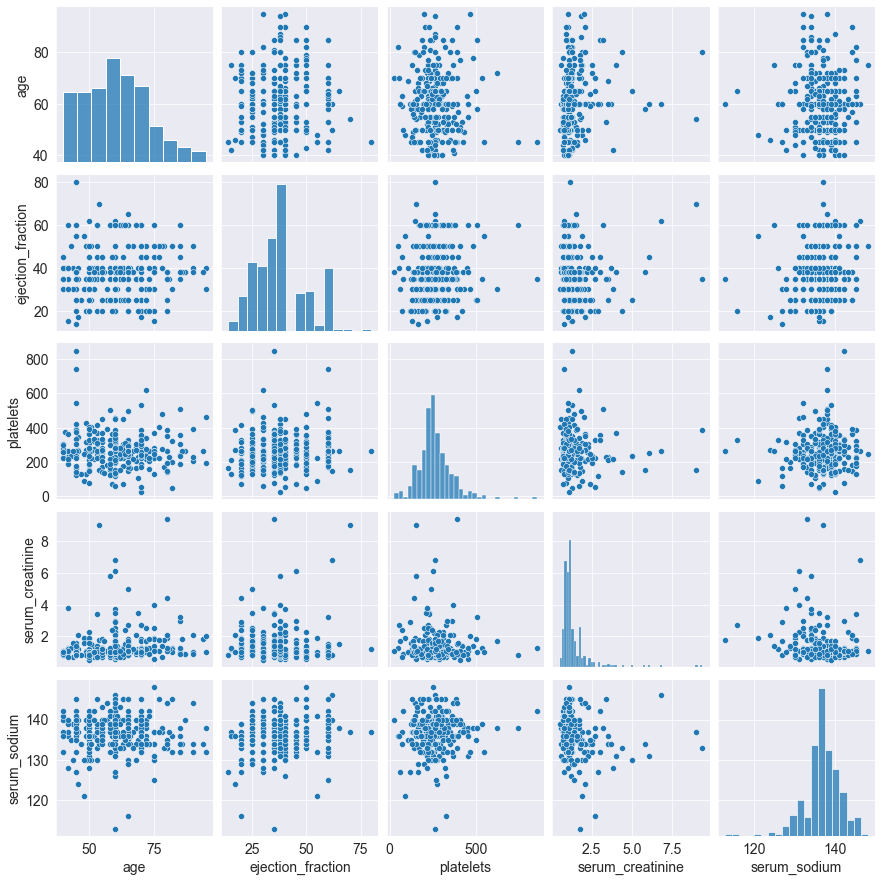

In [69]:
sns.pairplot(numeric_column);

Attributes - Distribution

Let's build distribution plot for all columns with numeric values.

Distribution plot helps us to find whether the variables are normally distributed or skewed.

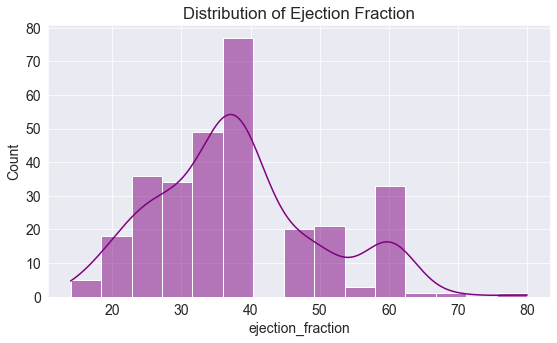

In [70]:
plt.title("Distribution of Ejection Fraction")
sns.histplot(df.ejection_fraction, kde = True, color ='purple');

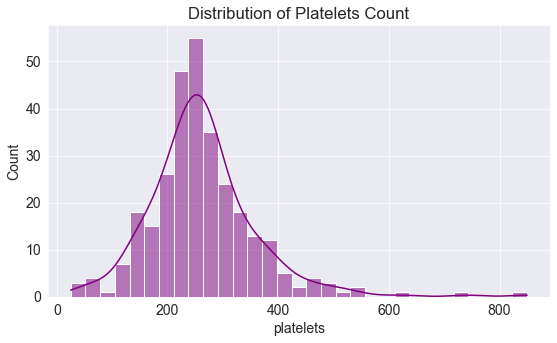

In [71]:
plt.title("Distribution of Platelets Count") 
sns.histplot(df.platelets, kde = True, color ='purple');

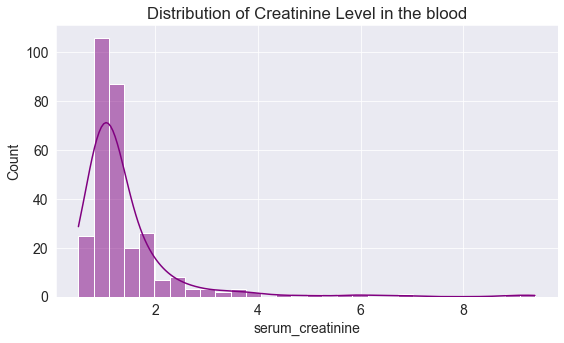

In [72]:
plt.title("Distribution of Creatinine Level in the blood") 
sns.histplot(df.serum_creatinine, kde = True, bins = 30, color ='purple');

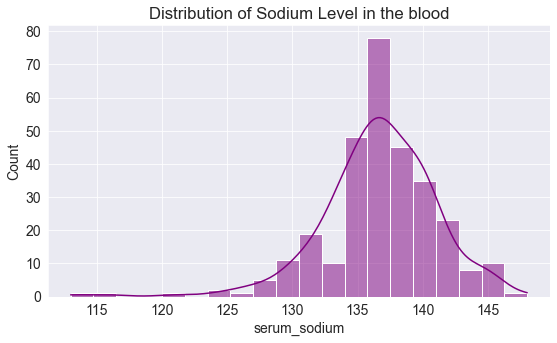

In [73]:
plt.title("Distribution of Sodium Level in the blood") 
sns.histplot(df.serum_sodium, kde = True, color ='purple');

Exploration

We've already gained several insights about the heart failure patients and their clinical records by exploring individual columns of the dataset. Let's ask some specific questions and we'll try to answer them using data frame operations and visualization.

Q: How many number of patients are there in our observation? out of them how many male and female patients are there?


In [74]:
df.shape


(299, 16)

In [75]:
df.sex.value_counts()

Male      194
Female    105
Name: sex, dtype: int64

In [76]:
column_details_df.normal_value['ejection_fraction']

'55% - 70%'

In [78]:
df[df.smoking == True]

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead,age_group,abnormal_ef,abnormal_platelets,abnormal_creatinine,abnormal_sodium
2,65,False,False,20,False,162,1.3,129,Male,True,True,65-70,Abormal,Normal,Abnormal,Abnormal
5,90,True,False,40,True,204,2.1,132,Male,True,True,90-95,Abormal,Normal,Abnormal,Abnormal
7,60,True,True,60,False,454,1.1,131,Male,True,True,60-65,Normal,Abnormal,Normal,Abnormal
9,80,True,False,35,True,388,9.4,133,Male,True,True,80-85,Abormal,Normal,Abnormal,Abnormal
10,75,True,False,38,True,368,4.0,131,Male,True,True,75-80,Abormal,Normal,Abnormal,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,52,False,True,38,False,382,1.0,140,Male,True,False,50-55,Abormal,Normal,Normal,Normal
293,63,True,True,35,False,179,0.9,136,Male,True,False,60-65,Abormal,Normal,Normal,Normal
294,62,False,True,38,True,155,1.1,143,Male,True,False,60-65,Abormal,Normal,Normal,Normal
297,45,False,False,38,False,140,1.4,140,Male,True,False,45-50,Abormal,Abnormal,Abnormal,Normal


In [79]:
smokers = df[df.smoking == True].groupby('sex').count()
smokers = smokers['smoking']
smokers

sex
Female     4
Male      92
Name: smoking, dtype: int64

Q: Does smoking habit affects the life of a heart failure patient?

In [80]:
smokers

sex
Female     4
Male      92
Name: smoking, dtype: int64

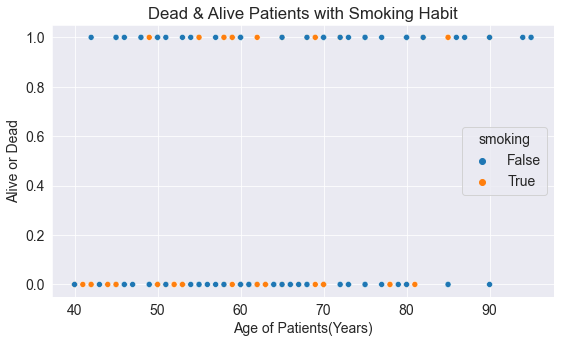

In [82]:
plt.title('Dead & Alive Patients with Smoking Habit')
plt.xlabel('Age of Patients(Years)')
plt.ylabel('Alive or Dead')
sns.scatterplot(x = 'age', y = 'patient_dead', hue = 'smoking', data = df);

In [83]:
df [(df.patient_dead == True) & (df.smoking == True )]

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,patient_dead,age_group,abnormal_ef,abnormal_platelets,abnormal_creatinine,abnormal_sodium
2,65,False,False,20,False,162,1.30,129,Male,True,True,65-70,Abormal,Normal,Abnormal,Abnormal
5,90,True,False,40,True,204,2.10,132,Male,True,True,90-95,Abormal,Normal,Abnormal,Abnormal
7,60,True,True,60,False,454,1.10,131,Male,True,True,60-65,Normal,Abnormal,Normal,Abnormal
9,80,True,False,35,True,388,9.40,133,Male,True,True,80-85,Abormal,Normal,Abnormal,Abnormal
10,75,True,False,38,True,368,4.00,131,Male,True,True,75-80,Abormal,Normal,Abnormal,Abnormal
11,62,False,False,25,True,253,0.90,140,Male,True,True,60-65,Abormal,Normal,Normal,Normal
22,68,True,False,35,True,289,0.90,140,Male,True,True,65-70,Abormal,Normal,Normal,Normal
25,80,False,True,38,False,149,1.90,144,Male,True,True,80-85,Abormal,Abnormal,Abnormal,Normal
27,70,False,True,45,True,284,1.30,136,Male,True,True,70-75,Abormal,Normal,Abnormal,Normal
29,82,False,True,30,False,200,1.20,132,Male,True,True,80-85,Abormal,Normal,Normal,Abnormal


Inferences and Conclusions

We've drawn many inferences from the survey. Here's a summary of a few of them:

Based on the recorded patients gender, we can infer that the dataset is slightly imbalanced, since only 35.1% of Patients were Female.
We have more number of patients under 60-65 age group and the next place goes to 50-55 age group. And the number of patients recorded starts declining from 65-70 age group, it's obvious since the life expectancy of a person in Pakistan in 2015 was approximately 67 years.
32.1% of patients died during the follow-up period. This might be because the data mentioned in our data frame corresponds to only the certain period of time (April'15 - December'15) and more number of patients might have died after this period (which isn't recorded).
Maximum patients died (during the follow-up period is) under 60-65 age group (i.e 15 Patients). It's obvious, since we have more number of patients in 60-65 age group. And the proportion of patients died starts increasing from 65-70 age group and the number of patients died is more than alive patients in the age group of 80-85, 85-90 and 90-95. This is because over the time, the body’s immune system naturally becomes less capable of handling new threats, such as viruses including novel corona virus. This increases the risk of having issues with various illnesses which ultimately leads to their end.
The proportion of male and female patients died during the follow-up period is almost equal (i.e ~32%).
The abnormality in Ejection Fraction(EF) is the most common factor among the heart failure patients. Abnormal Ejection Fraction is followed by the abnormal creatinine and sodium level in the blood respectively, the factor which is least common among the heart failure patients is abnormal Platelets Count (i.e only 47 Patients).
No medical record values have been normally distributed. Platelets count, Ejection Fraction and Creatinine Level are right skewed and Sodium Level is left skewed.
The most common abnormality or disease among the heart failure patients is Ejection Fraction and 261 Patients had abnormal Ejection Fraction.
The least common abnormality or disease among the heart failure patients is Abnormal Platelets Count and 47 Patients had abnormal Platelets Count.
Though they had normal ejection fraction and normal creatinine level in the blood, some patients with smoking habit died. So, we can conclude that the smoking habit has little impact on the life expectancy of a heart failure patient.